<a href="https://colab.research.google.com/github/parisazeynaly/House_price/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
 # import data :

import urllib.request

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)

    return data

In [3]:
# check data :
data=download_read_data(data_path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# get some info for data :

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# EDA
2.pro


2.1 data processing


In [5]:
from sklearn.model_selection import train_test_split

data_train,data_test=train_test_split(data,test_size=0.1,random_state=20)

In [7]:
# make copy from train data to work on it :

train_data=data_train.copy()

train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,150800.0,NEAR OCEAN
9757,-121.44,36.51,31.0,1636.0,380.0,1468.0,339.0,3.2219,114700.0,<1H OCEAN
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,273000.0,NEAR OCEAN
11742,-121.15,38.91,23.0,1654.0,299.0,787.0,299.0,4.2723,193100.0,INLAND
1871,-119.95,38.94,24.0,2180.0,517.0,755.0,223.0,2.5875,173400.0,INLAND


In [8]:
# explore catogrical data :

train_data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,8231
INLAND,5896
NEAR OCEAN,2384
NEAR BAY,2061
ISLAND,4


<Axes: xlabel='ocean_proximity', ylabel='count'>

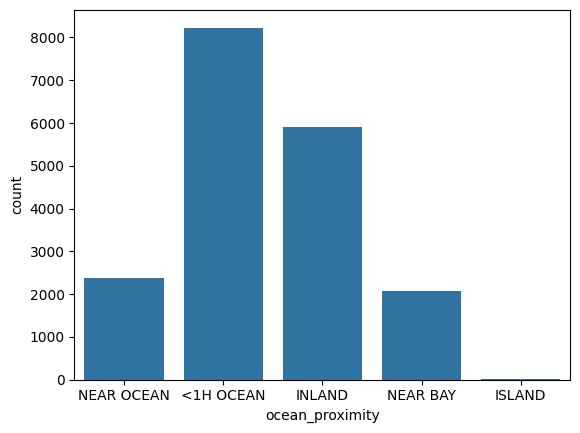

In [9]:
# make it as countplot

sns.countplot(data=train_data, x='ocean_proximity')

In [10]:
# check missing values:

train_data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,186
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [11]:
# check missing values:

train_data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,186
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


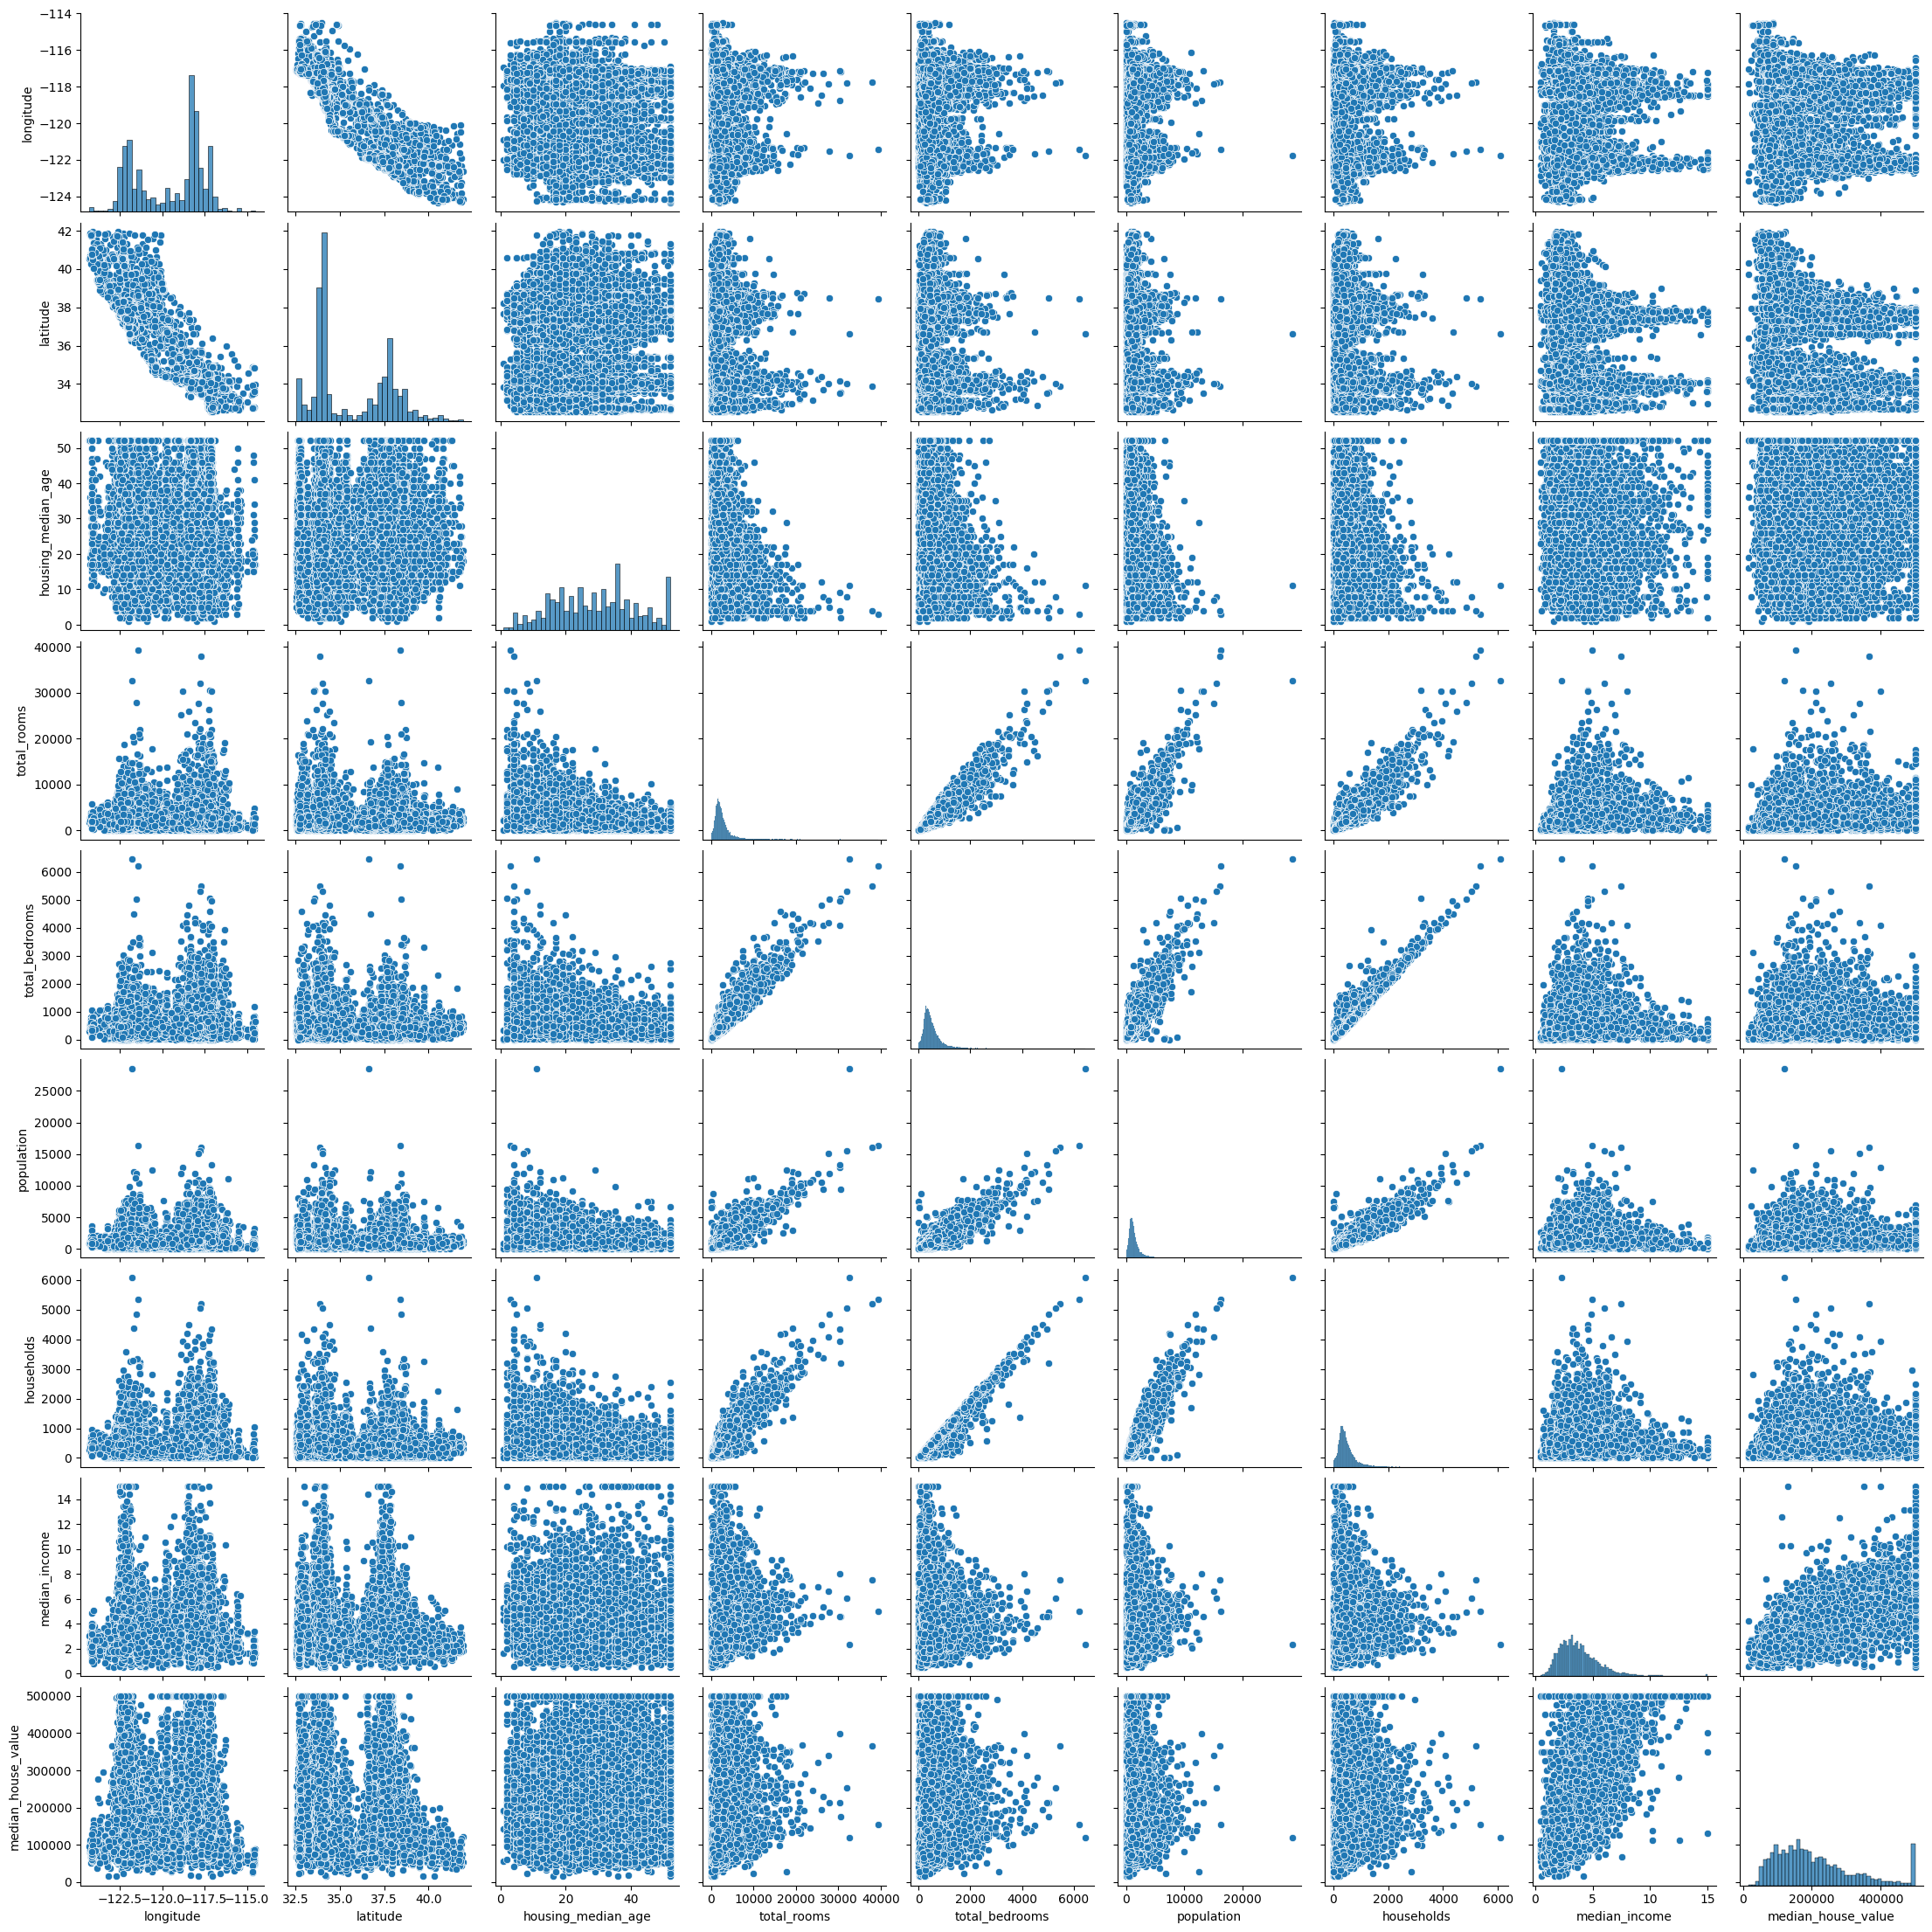

In [12]:
# ploting important insigts :

sns.pairplot(train_data)

In [14]:
# divide train data as input and labels :

train_input_data=train_data.drop('median_house_value',axis=1)
labels=train_data['median_house_value']

handling missing values

In [15]:
# apply simple imputer in numrical data :

from sklearn.impute import SimpleImputer

numrical_train_data=train_input_data.drop('ocean_proximity',axis=1)

imputer=SimpleImputer(strategy='mean')

train_data_without_missingValues=imputer.fit_transform(numrical_train_data)

In [16]:
# convert result to dataframe :

numrical_train_data_imputed=pd.DataFrame(train_data_without_missingValues,columns=numrical_train_data.columns,index=numrical_train_data.index)

numrical_train_data_imputed.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0


In [17]:
# add this result to train_input_data :

train_input_data[numrical_train_data.columns] = numrical_train_data_imputed

train_input_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0


2.3 Encoding categorical feature

In [18]:
# encode categorical column with ordinary encoder :

from sklearn.preprocessing import OrdinalEncoder

cat_col=train_input_data[['ocean_proximity']]

encoder=OrdinalEncoder()

encoded_col=encoder.fit_transform(cat_col)

In [19]:
# convert result to data frame :

encoded_col_df=pd.DataFrame(encoded_col,columns=cat_col.columns,index=cat_col.index)

In [20]:
# add this col to train_input_data:

train_input_data['ocean_proximity']=encoded_col_df

train_input_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,4.0
9757,-121.44,36.51,31.0,1636.0,380.0,1468.0,339.0,3.2219,0.0
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,4.0
11742,-121.15,38.91,23.0,1654.0,299.0,787.0,299.0,4.2723,1.0
1871,-119.95,38.94,24.0,2180.0,517.0,755.0,223.0,2.5875,1.0


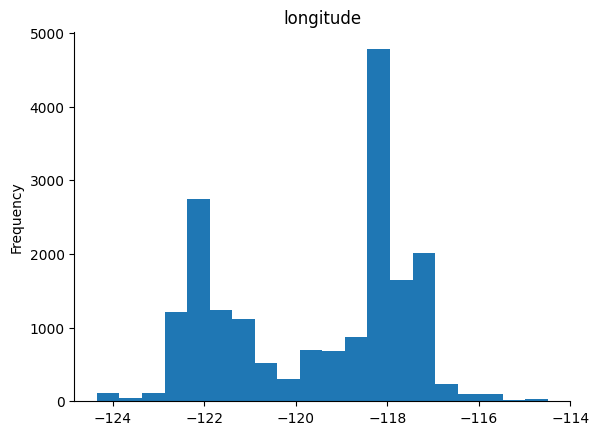

In [21]:
# @title longitude

from matplotlib import pyplot as plt
train_input_data['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

2.4 Scaling Numerical features

In [22]:
# Scaling Numerical features using snaderizaion :

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scalered_train_data=scaler.fit_transform(train_input_data)

scalered_train_data

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.58313172,
        -0.31168387,  1.99773467],
       [-0.93598814,  0.41242353,  0.18557502, ..., -0.42237836,
        -0.34110223, -0.81997336],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.11663747,
         0.80468775,  1.99773467],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.12985994,
         0.30957512, -0.81997336],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.54741244,
         1.00398532, -0.81997336],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.12195403,
        -0.07959982,  1.29330766]])

In [23]:
# convert result to data frame :

scalered_train_data_df=pd.DataFrame(scalered_train_data,columns=train_input_data.columns)

In [24]:
# add this to train_input_data :

train_input_data=scalered_train_data_df

train_input_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.678586,-0.857967,0.978993,-0.636380,-0.621671,-0.334168,-0.583132,-0.311684,1.997735
1,-0.935988,0.412424,0.185575,-0.458912,-0.378628,0.041242,-0.422378,-0.341102,-0.819973
2,-1.455851,0.918705,0.026891,1.501530,1.014655,1.231701,1.116637,0.804688,1.997735
3,-0.791026,1.537492,-0.449159,-0.450615,-0.573543,-0.574793,-0.527790,0.211689,-0.115546
4,-0.191185,1.551556,-0.369817,-0.208152,-0.048957,-0.603740,-0.728073,-0.674966,-0.115546


# 3. apply ML model into data after handling

In [25]:
model=LinearRegression()

model.fit(train_input_data,labels)

LinearRegression()

# 4-Evaluation for my model

In [26]:
from sklearn.metrics import mean_squared_error

test_input_data = data_test.drop('median_house_value', axis=1)
test_labels = data_test['median_house_value']

predictions=model.predict(train_input_data)

mse=mean_squared_error(labels, predictions)

rmse = np.sqrt(mse)

rmse

69305.18482514977

# 5. comput acuracy for this model¶


In [27]:
accuracy = model.score(train_input_data, labels)
print("Accuracy percentage: ", accuracy * 100, "%")

Accuracy percentage:  63.82851178704543 %
